# Parameters

In [1]:
EPOCHS = 20
LEARNING_RATE = 3e-5
BATCH_SIZE = 256
LAYERS_TO_TRAIN = 1

In [2]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

c:\Users\Alonso\Documents\## UPM\MASTER\NLP\practica\NLP\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


device(type='cuda')

In [3]:
ai_generated_path = "pan24-generative-authorship-news/machines"
human_path = "pan24-generative-authorship-news/human.jsonl"

In [4]:
import warnings
import logging

warnings.filterwarnings("ignore", message=".*overflowing tokens.*")
logging.disable(logging.WARNING)

## Libraries

In [5]:
import os
import json
import pandas as pd

## Import data

In [6]:
model, id, text = [], [], []

# Loop through every file in the directory
for filename in os.listdir(ai_generated_path):
    # Check if the file is a JSONL file
    if filename.endswith('.jsonl'):
        filepath = os.path.join(ai_generated_path, filename)
        with open(filepath, 'r', encoding='utf-8') as jsonl_file:
            for line in jsonl_file:
                # Each line is a separate JSON object
                data = json.loads(line)
                model.append(filename)
                id.append(data['id'])
                text.append(data['text'])

df_generated = pd.DataFrame({'model': model, 'id': id, 'text': text, 'ai_generated': 1})
df_generated

,model,id,text,ai_generated
0,alpaca-7b.jsonl,alpaca-7b/news-2021-01-01-2021-12-31-bideninau...,Inaugural Address: President Joseph R. Biden J...,1
1,alpaca-7b.jsonl,alpaca-7b/news-2021-01-01-2021-12-31-bideninau...,Setting the Record Straight: Fact-Checking the...,1
2,alpaca-7b.jsonl,alpaca-7b/news-2021-01-01-2021-12-31-bideninau...,Joe Biden Takes the Oath of Office as 46th Pre...,1
3,alpaca-7b.jsonl,alpaca-7b/news-2021-01-01-2021-12-31-bideninau...,Joe Biden Takes Oath as 46th President of Unit...,1
4,alpaca-7b.jsonl,alpaca-7b/news-2021-01-01-2021-12-31-bideninau...,Amanda Gorman's Inspiring Poem Celebrates Hope...,1
...,...,...,...,...
14126,vicgalle-gpt2-open-instruct-v1.jsonl,vicgalle-gpt2-open-instruct-v1/news-2021-01-01...,'The Disappearance of Gabby Petito' – A Compre...,1
14127,vicgalle-gpt2-open-instruct-v1.jsonl,vicgalle-gpt2-open-instruct-v1/news-2021-01-01...,"Utah State Police Search for Gabby Petito, Tra...",1
14128,vicgalle-gpt2-open-instruct-v1.jsonl,vicgalle-gpt2-open-instruct-v1/news-2021-01-01...,McKenna's Lost Friend: Debunking the Evidence ...,1
14129,vicgalle-gpt2-open-instruct-v1.jsonl,vicgalle-gpt2-open-instruct-v1/news-2021-01-01...,"""Gunshots Found in Florida Nature Preserve: A ...",1


In [7]:
id, text = [], []

with open(human_path, 'r', encoding='utf-8') as jsonl_file:
    for line in jsonl_file:
        # Each line is a separate JSON object
        data = json.loads(line)
        id.append(data['id'])
        text.append(data['text'])

df_human = pd.DataFrame({'model': 'Human', 'id': id, 'text': text, 'ai_generated': 0})
df_human

,model,id,text,ai_generated
0,Human,articles-cleaned-truncated/news-2021-01-01-202...,Inaugural Address by President Joseph R. Biden...,0
1,Human,articles-cleaned-truncated/news-2021-01-01-202...,Fact check: Biden inauguration impacted by pan...,0
2,Human,articles-cleaned-truncated/news-2021-01-01-202...,Highlights from Joe Biden's 2021 inauguration\...,0
3,Human,articles-cleaned-truncated/news-2021-01-01-202...,"Biden takes the helm, appeals for unity to tak...",0
4,Human,articles-cleaned-truncated/news-2021-01-01-202...,'The Hill We Climb': Read Amanda Gorman's inau...,0
...,...,...,...,...
1082,Human,articles-cleaned-truncated/news-2021-01-01-202...,How amateur detectives on social media helped ...,0
1083,Human,articles-cleaned-truncated/news-2021-01-01-202...,Authorities searching for missing 22-year-old ...,0
1084,Human,articles-cleaned-truncated/news-2021-01-01-202...,Univ. of Wisconsin Oshkosh student helping Gab...,0
1085,Human,articles-cleaned-truncated/news-2021-01-01-202...,Did the Internet Actually Help Find Gabby Peti...,0


In [8]:
df = pd.concat([df_generated, df_human])[['text', 'ai_generated', 'id']]
df

,text,ai_generated,id
0,Inaugural Address: President Joseph R. Biden J...,1,alpaca-7b/news-2021-01-01-2021-12-31-bideninau...
1,Setting the Record Straight: Fact-Checking the...,1,alpaca-7b/news-2021-01-01-2021-12-31-bideninau...
2,Joe Biden Takes the Oath of Office as 46th Pre...,1,alpaca-7b/news-2021-01-01-2021-12-31-bideninau...
3,Joe Biden Takes Oath as 46th President of Unit...,1,alpaca-7b/news-2021-01-01-2021-12-31-bideninau...
4,Amanda Gorman's Inspiring Poem Celebrates Hope...,1,alpaca-7b/news-2021-01-01-2021-12-31-bideninau...
...,...,...,...
1082,How amateur detectives on social media helped ...,0,articles-cleaned-truncated/news-2021-01-01-202...
1083,Authorities searching for missing 22-year-old ...,0,articles-cleaned-truncated/news-2021-01-01-202...
1084,Univ. of Wisconsin Oshkosh student helping Gab...,0,articles-cleaned-truncated/news-2021-01-01-202...
1085,Did the Internet Actually Help Find Gabby Peti...,0,articles-cleaned-truncated/news-2021-01-01-202...


# Process Data - Combinaciones únicamente del mismo id

In [9]:
from sklearn.model_selection import train_test_split
import pandas as pd

test_size = 0.25
val_size = 0.125
_adjusted_val_size = val_size / (1 - test_size)

# Extraer el segundo y tercer segmento de los IDs
df['base_id'] = df['id'].apply(lambda x: '/'.join(x.split('/')[1:]))  # Coger los ids sin la parte que identifica al autor del fragmento de texto.

# Paso 1: Dividir los datos según los `base_id`
base_ids = df['base_id'].unique()
train_base_ids, test_base_ids = train_test_split(base_ids, test_size=test_size, random_state=1337)
train_base_ids, val_base_ids = train_test_split(train_base_ids, test_size=_adjusted_val_size, random_state=1337) 

# Crear DataFrames por conjunto
train = df[df['base_id'].isin(train_base_ids)]
val = df[df['base_id'].isin(val_base_ids)]
test = df[df['base_id'].isin(test_base_ids)]

train.reset_index(drop=True, inplace=True)
val.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

print(f"train shape: {train.shape}")
print(f"val shape: {val.shape}")
print(f"test shape: {test.shape}")

train shape: (9506, 4)
val shape: (1904, 4)
test shape: (3808, 4)


In [10]:
def create_combinations_within_id(df):
    # Lista para almacenar las combinaciones de cada `base_id`
    combinations = []
    
    # Iterar sobre cada `base_id`
    for _, group in df.groupby('base_id'):
        # Filtrar textos humanos e IA dentro del grupo
        df_human = group[group['ai_generated'] == 0][['text']].reset_index(drop=True)
        df_ia = group[group['ai_generated'] == 1][['text']].reset_index(drop=True)
        
        # Producto cartesiano dentro del `base_id`
        cartesian_df = df_human.merge(df_ia, how='cross', suffixes=('_human', '_ia'))
        cartesian_df = cartesian_df.sample(frac=1).reset_index(drop=True)
        
        # Crear las dos disposiciones
        total_combinations = len(cartesian_df)
        
        half_1 = cartesian_df.iloc[:total_combinations // 2].copy()
        half_1['comment_text_1'] = half_1['text_human']
        half_1['comment_text_2'] = half_1['text_ia']
        half_1['list'] = 0  # Etiqueta 0
        
        half_2 = cartesian_df.iloc[total_combinations // 2:].copy()
        half_2['comment_text_1'] = half_2['text_ia']
        half_2['comment_text_2'] = half_2['text_human']
        half_2['list'] = 1  # Etiqueta 1
        
        # Combinar y agregar al resultado final
        balanced_df = pd.concat([half_1, half_2], ignore_index=True)
        combinations.append(balanced_df)
    
    # Concatenar todas las combinaciones y barajar
    return pd.concat(combinations, ignore_index=True).sample(frac=1).reset_index(drop=True)


In [11]:
# Generar combinaciones restringidas por `id` para cada conjunto
train = create_combinations_within_id(train)
val = create_combinations_within_id(val)
test = create_combinations_within_id(test)

In [12]:
# Print the dimensions
print(f"train shape: {train.shape} / Text on comment_text_1 is human-generated: {train['list'].value_counts()[0]} - Text on comment_text_2 is human-generated: {train['list'].value_counts()[1]}")
print(f"val shape: {val.shape} / Text on comment_text_1 is human-generated: {val['list'].value_counts()[0]} - Text on comment_text_2 is human-generated: {val['list'].value_counts()[1]}")
print(f"test shape: {test.shape} / Text on comment_text_1 is human-generated: {test['list'].value_counts()[0]} - Text on comment_text_2 is human-generated: {test['list'].value_counts()[1]}")

train shape: (8827, 5) / Text on comment_text_1 is human-generated: 4074 - Text on comment_text_2 is human-generated: 4753
val shape: (1768, 5) / Text on comment_text_1 is human-generated: 816 - Text on comment_text_2 is human-generated: 952
test shape: (3536, 5) / Text on comment_text_1 is human-generated: 1632 - Text on comment_text_2 is human-generated: 1904


# Model

In [13]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, DistilBertModel
import torch
from transformers import BertTokenizer, BertModel

# Tokenizador y modelo
model_name = "Lau123/distilbert-base-uncased-detect_ai_generated_text"
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
# individual_model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=2)
individual_model = DistilBertModel.from_pretrained(model_name, num_labels=2)

In [14]:
for param in individual_model.parameters():
    param.requires_grad = False
if LAYERS_TO_TRAIN > 0:
    for layer in individual_model.transformer.layer[-LAYERS_TO_TRAIN:]:
        for param in layer.parameters():
            param.requires_grad = True

# Verify that only the classifier layer is trainable
for name, param in individual_model.named_parameters():
    print(f"{name}: requires_grad = {param.requires_grad}")

embeddings.word_embeddings.weight: requires_grad = False
embeddings.position_embeddings.weight: requires_grad = False
embeddings.LayerNorm.weight: requires_grad = False
embeddings.LayerNorm.bias: requires_grad = False
transformer.layer.0.attention.q_lin.weight: requires_grad = False
transformer.layer.0.attention.q_lin.bias: requires_grad = False
transformer.layer.0.attention.k_lin.weight: requires_grad = False
transformer.layer.0.attention.k_lin.bias: requires_grad = False
transformer.layer.0.attention.v_lin.weight: requires_grad = False
transformer.layer.0.attention.v_lin.bias: requires_grad = False
transformer.layer.0.attention.out_lin.weight: requires_grad = False
transformer.layer.0.attention.out_lin.bias: requires_grad = False
transformer.layer.0.sa_layer_norm.weight: requires_grad = False
transformer.layer.0.sa_layer_norm.bias: requires_grad = False
transformer.layer.0.ffn.lin1.weight: requires_grad = False
transformer.layer.0.ffn.lin1.bias: requires_grad = False
transformer.laye

## Individual

In [15]:
from transformers import BertModel
import torch
import torch.nn.functional as F

class IndividualTransformer(torch.nn.Module):
    def __init__(self, bert_model):
        super(IndividualTransformer, self).__init__()
        self.l1 = bert_model  # Modelo BERT o similar
        self.l2 = torch.nn.Linear(768, 768)  # Proyección del embedding
        self.l3 = torch.nn.Dropout(0.1)  # Regularización dropout
        self.l4 = torch.nn.Linear(768, 1)  # Salida de un solo valor (clasificación binaria)

    def forward(self, ids, mask, token_type_ids):
        # Generar embeddings para el texto de entrada
        embed = self.l1(ids, attention_mask=mask).last_hidden_state[:, 0]
        
        # Aplicar capas adicionales
        embed = F.gelu(self.l3(self.l2(embed)))  # Aplicar proyección y activación GELU
        
        # Realizar la clasificación binaria usando sigmoid
        logits = self.l4(embed)  # Salida no activada
        prediction = torch.sigmoid(logits)  # Aplicar sigmoid para obtener la probabilidad
        
        return prediction  # Devuelve la probabilidad de clase 1 (0 a 1)

# Inicializar modelo
model = IndividualTransformer(individual_model)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

IndividualTransformer(
  (l1): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            (lin1): Linear(in

In [16]:
from transformers import AdamW

loss_fn = torch.nn.BCELoss()
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)

c:\Users\Alonso\Documents\## UPM\MASTER\NLP\practica\NLP\venv\lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


# Data Generators

In [17]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.comment_text_1 = dataframe.comment_text_1
        self.comment_text_2 = dataframe.comment_text_2
        self.targets = self.data.list
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        comment_text_1 = str(self.comment_text_1[index])
        comment_text_1 = " ".join(comment_text_1.split())
        comment_text_2 = str(self.comment_text_2[index])
        comment_text_2 = " ".join(comment_text_2.split())

        inputs = self.tokenizer(comment_text_1,
                                comment_text_2,
                                max_length=self.max_len,
                                padding="max_length",
                                truncation=True,
                                # truncation="only_second",
                                # truncation="only_first",
                                # truncation="longest_first",
                                return_overflowing_tokens=False,
                                return_token_type_ids=True,)
                                # return_overflowing_tokens=True)
                                # return_overflowing_tokens=False)
        return {
            'ids': torch.tensor(inputs.input_ids, dtype=torch.long),
            'mask': torch.tensor(inputs.attention_mask, dtype=torch.long),
            'token_type_ids': torch.tensor(inputs.token_type_ids, dtype=torch.long),
            'labels': torch.tensor(self.targets[index], dtype=torch.long)
          }


In [18]:
# Instancia el dataset
train_dataset = CustomDataset(dataframe=train, tokenizer=tokenizer, max_len=512)
val_dataset = CustomDataset(dataframe=val, tokenizer=tokenizer, max_len=512)
test_dataset = CustomDataset(dataframe=test, tokenizer=tokenizer, max_len=512)

In [19]:
from torch.utils.data import DataLoader

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# Entrenamiento y validación

In [20]:
def c_at_1(targets, preds):
    """
    Calculates the C@1 metric:
    - Non-answers (predictions marked as -1) are given a score of 0.5.
    - Remaining cases are scored based on accuracy.
    
    Parameters:
        targets (np.array): Ground truth labels.
        preds (np.array): Predictions, where -1 indicates a non-answer.
    
    Returns:
        float: C@1 metric.
    """
    correct = (targets == preds)  # Boolean array for correct predictions
    unanswered = preds == -1     # Boolean array for non-answers
    
    num_correct = correct.sum()
    num_total = len(targets)
    num_unanswered = unanswered.sum()
    
    return (num_correct + num_unanswered * 0.5) / num_total

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, brier_score_loss, fbeta_score
import numpy as np
from tqdm import tqdm

# Función de entrenamiento
def train_epoch(model, loader, optimizer, loss_fn, device):
    model.train()
    total_loss = 0

    # Use tqdm to wrap the loader for a progress bar
    for batch in tqdm(loader, desc="Training", leave=True):
        labels = batch['labels'].unsqueeze(1).to(device).float()
        batch = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
        outputs = model(**batch)

        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(loader)

# Función de evaluación
def evaluate(model, loader, device):
    model.eval()
    preds, targets, probabilities = [], [], []

    with torch.no_grad():
        for batch in loader:
            labels = batch['labels'].unsqueeze(1).float()
            batch = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
            outputs = model(**batch)
            probabilities.extend(outputs.cpu().numpy())
            preds.extend(torch.round(outputs).cpu().numpy())
            targets.extend(labels.cpu().numpy())
    
    targets = np.array(targets).flatten()
    preds = np.array(preds).flatten()
    probabilities = np.array(probabilities).flatten()
    
    # Calculate metrics
    roc_auc = roc_auc_score(targets, probabilities)
    brier = brier_score_loss(targets, probabilities)
    f1 = f1_score(targets, preds)
    f05u = fbeta_score(targets, preds, beta=0.5)
    c1 = c_at_1(targets, preds)
    mean = np.mean([roc_auc, 1- brier, c1, f1, f05u])
    
    return {
        "accuracy": accuracy_score(targets, preds),
        "roc-auc": roc_auc,
        "brier": brier,
        "c@1": c1,
        "f1": f1,
        "f05u": f05u,
        "mean": mean,
    }


In [22]:
history = {
    "train_loss": [],
    "train_metrics": [],
    "val_metrics": []
}

save_path = f"models/models_individual_concatenate_embeddings/distil-bert-base/fine_tuned_model_{EPOCHS}_epochs_{LEARNING_RATE}_lr_{LAYERS_TO_TRAIN}_layers_{BATCH_SIZE}_batch_size"

for epoch in range(EPOCHS):
    print(f"Starting Epoch {epoch + 1}/{EPOCHS}")
    print("* Training")
    train_loss = train_epoch(model, train_loader, optimizer, loss_fn, device)

    print("* Saving model")
    _epoch_save_path = f"{save_path}_checkpoint_{epoch + 1}.pth"
    torch.save(model, _epoch_save_path)

    print("* Calculating metrics for training")
    train_metrics  = evaluate(model, train_loader, device)
    print("* Calculating metrics for validation")
    val_metrics  = evaluate(model, val_loader, device)

    history["train_loss"].append(train_loss)
    history["train_metrics"].append(train_metrics)
    history["val_metrics"].append(val_metrics)

    print(f"Epoch {epoch + 1}/{EPOCHS}")
    print(f"Train Loss: {train_loss:.4f}")
    print("Train Metrics:")
    for metric_name, value in train_metrics.items():
        print(f"  {metric_name}: {value:.4f}")
    print("Validation Metrics:")
    for metric_name, value in val_metrics.items():
        print(f"  {metric_name}: {value:.4f}")

Starting Epoch 1/20
* Training


Training: 100%|██████████| 35/35 [01:45<00:00,  3.01s/it]


* Saving model
* Calculating metrics for training
* Calculating metrics for validation
Epoch 1/20
Train Loss: 0.6747
Train Metrics:
  accuracy: 0.7516
  roc-auc: 0.8640
  brier: 0.2157
  c@1: 0.7516
  f1: 0.7979
  f05u: 0.7427
  mean: 0.7881
Validation Metrics:
  accuracy: 0.8003
  roc-auc: 0.8829
  brier: 0.2123
  c@1: 0.8003
  f1: 0.8313
  f05u: 0.7886
  mean: 0.8182
Starting Epoch 2/20
* Training


Training: 100%|██████████| 35/35 [01:41<00:00,  2.89s/it]


* Saving model
* Calculating metrics for training
* Calculating metrics for validation
Epoch 2/20
Train Loss: 0.4917
Train Metrics:
  accuracy: 0.8687
  roc-auc: 0.9415
  brier: 0.0969
  c@1: 0.8687
  f1: 0.8738
  f05u: 0.8927
  mean: 0.8960
Validation Metrics:
  accuracy: 0.8682
  roc-auc: 0.9476
  brier: 0.0946
  c@1: 0.8682
  f1: 0.8712
  f05u: 0.8995
  mean: 0.8984
Starting Epoch 3/20
* Training


Training: 100%|██████████| 35/35 [01:41<00:00,  2.91s/it]


* Saving model
* Calculating metrics for training
* Calculating metrics for validation
Epoch 3/20
Train Loss: 0.2721
Train Metrics:
  accuracy: 0.9029
  roc-auc: 0.9664
  brier: 0.0705
  c@1: 0.9029
  f1: 0.9093
  f05u: 0.9125
  mean: 0.9241
Validation Metrics:
  accuracy: 0.9095
  roc-auc: 0.9688
  brier: 0.0679
  c@1: 0.9095
  f1: 0.9147
  f05u: 0.9230
  mean: 0.9296
Starting Epoch 4/20
* Training


Training: 100%|██████████| 35/35 [01:41<00:00,  2.91s/it]


* Saving model
* Calculating metrics for training
* Calculating metrics for validation
Epoch 4/20
Train Loss: 0.2053
Train Metrics:
  accuracy: 0.9278
  roc-auc: 0.9807
  brier: 0.0532
  c@1: 0.9278
  f1: 0.9343
  f05u: 0.9235
  mean: 0.9426
Validation Metrics:
  accuracy: 0.9400
  roc-auc: 0.9819
  brier: 0.0487
  c@1: 0.9400
  f1: 0.9444
  f05u: 0.9438
  mean: 0.9523
Starting Epoch 5/20
* Training


Training: 100%|██████████| 35/35 [01:41<00:00,  2.91s/it]


* Saving model
* Calculating metrics for training
* Calculating metrics for validation
Epoch 5/20
Train Loss: 0.1610
Train Metrics:
  accuracy: 0.9428
  roc-auc: 0.9880
  brier: 0.0421
  c@1: 0.9428
  f1: 0.9479
  f05u: 0.9367
  mean: 0.9547
Validation Metrics:
  accuracy: 0.9502
  roc-auc: 0.9887
  brier: 0.0375
  c@1: 0.9502
  f1: 0.9541
  f05u: 0.9505
  mean: 0.9612
Starting Epoch 6/20
* Training


Training: 100%|██████████| 35/35 [01:43<00:00,  2.94s/it]


* Saving model
* Calculating metrics for training
* Calculating metrics for validation
Epoch 6/20
Train Loss: 0.1388
Train Metrics:
  accuracy: 0.9572
  roc-auc: 0.9920
  brier: 0.0325
  c@1: 0.9572
  f1: 0.9604
  f05u: 0.9580
  mean: 0.9670
Validation Metrics:
  accuracy: 0.9621
  roc-auc: 0.9920
  brier: 0.0299
  c@1: 0.9621
  f1: 0.9648
  f05u: 0.9651
  mean: 0.9708
Starting Epoch 7/20
* Training


Training: 100%|██████████| 35/35 [01:42<00:00,  2.93s/it]


* Saving model
* Calculating metrics for training
* Calculating metrics for validation
Epoch 7/20
Train Loss: 0.1150
Train Metrics:
  accuracy: 0.9477
  roc-auc: 0.9940
  brier: 0.0371
  c@1: 0.9477
  f1: 0.9531
  f05u: 0.9330
  mean: 0.9582
Validation Metrics:
  accuracy: 0.9644
  roc-auc: 0.9931
  brier: 0.0297
  c@1: 0.9644
  f1: 0.9678
  f05u: 0.9529
  mean: 0.9697
Starting Epoch 8/20
* Training


Training: 100%|██████████| 35/35 [01:41<00:00,  2.91s/it]


* Saving model
* Calculating metrics for training
* Calculating metrics for validation
Epoch 8/20
Train Loss: 0.1038
Train Metrics:
  accuracy: 0.9695
  roc-auc: 0.9955
  brier: 0.0236
  c@1: 0.9695
  f1: 0.9718
  f05u: 0.9697
  mean: 0.9766
Validation Metrics:
  accuracy: 0.9661
  roc-auc: 0.9937
  brier: 0.0254
  c@1: 0.9661
  f1: 0.9684
  f05u: 0.9702
  mean: 0.9746
Starting Epoch 9/20
* Training


Training: 100%|██████████| 35/35 [01:42<00:00,  2.92s/it]


* Saving model
* Calculating metrics for training
* Calculating metrics for validation
Epoch 9/20
Train Loss: 0.0903
Train Metrics:
  accuracy: 0.9681
  roc-auc: 0.9969
  brier: 0.0233
  c@1: 0.9681
  f1: 0.9709
  f05u: 0.9602
  mean: 0.9745
Validation Metrics:
  accuracy: 0.9751
  roc-auc: 0.9948
  brier: 0.0215
  c@1: 0.9751
  f1: 0.9772
  f05u: 0.9688
  mean: 0.9789
Starting Epoch 10/20
* Training


Training: 100%|██████████| 35/35 [01:42<00:00,  2.94s/it]


* Saving model
* Calculating metrics for training
* Calculating metrics for validation
Epoch 10/20
Train Loss: 0.0820
Train Metrics:
  accuracy: 0.9761
  roc-auc: 0.9976
  brier: 0.0185
  c@1: 0.9761
  f1: 0.9776
  f05u: 0.9838
  mean: 0.9833
Validation Metrics:
  accuracy: 0.9655
  roc-auc: 0.9950
  brier: 0.0251
  c@1: 0.9655
  f1: 0.9676
  f05u: 0.9747
  mean: 0.9755
Starting Epoch 11/20
* Training


Training: 100%|██████████| 35/35 [01:42<00:00,  2.93s/it]


* Saving model
* Calculating metrics for training
* Calculating metrics for validation
Epoch 11/20
Train Loss: 0.0842
Train Metrics:
  accuracy: 0.9812
  roc-auc: 0.9980
  brier: 0.0149
  c@1: 0.9812
  f1: 0.9825
  f05u: 0.9830
  mean: 0.9860
Validation Metrics:
  accuracy: 0.9751
  roc-auc: 0.9955
  brier: 0.0193
  c@1: 0.9751
  f1: 0.9770
  f05u: 0.9751
  mean: 0.9807
Starting Epoch 12/20
* Training


Training: 100%|██████████| 35/35 [01:42<00:00,  2.92s/it]


* Saving model
* Calculating metrics for training
* Calculating metrics for validation
Epoch 12/20
Train Loss: 0.0634
Train Metrics:
  accuracy: 0.9831
  roc-auc: 0.9985
  brier: 0.0131
  c@1: 0.9831
  f1: 0.9844
  f05u: 0.9822
  mean: 0.9870
Validation Metrics:
  accuracy: 0.9791
  roc-auc: 0.9958
  brier: 0.0176
  c@1: 0.9791
  f1: 0.9807
  f05u: 0.9773
  mean: 0.9830
Starting Epoch 13/20
* Training


Training: 100%|██████████| 35/35 [01:42<00:00,  2.93s/it]


* Saving model
* Calculating metrics for training
* Calculating metrics for validation
Epoch 13/20
Train Loss: 0.0670
Train Metrics:
  accuracy: 0.9759
  roc-auc: 0.9985
  brier: 0.0188
  c@1: 0.9759
  f1: 0.9772
  f05u: 0.9884
  mean: 0.9842
Validation Metrics:
  accuracy: 0.9564
  roc-auc: 0.9957
  brier: 0.0326
  c@1: 0.9564
  f1: 0.9584
  f05u: 0.9758
  mean: 0.9707
Starting Epoch 14/20
* Training


Training: 100%|██████████| 35/35 [01:42<00:00,  2.93s/it]


* Saving model
* Calculating metrics for training
* Calculating metrics for validation
Epoch 14/20
Train Loss: 0.0588
Train Metrics:
  accuracy: 0.9873
  roc-auc: 0.9990
  brier: 0.0103
  c@1: 0.9873
  f1: 0.9883
  f05u: 0.9852
  mean: 0.9899
Validation Metrics:
  accuracy: 0.9796
  roc-auc: 0.9961
  brier: 0.0172
  c@1: 0.9796
  f1: 0.9813
  f05u: 0.9758
  mean: 0.9831
Starting Epoch 15/20
* Training


Training: 100%|██████████| 35/35 [01:42<00:00,  2.93s/it]


* Saving model
* Calculating metrics for training
* Calculating metrics for validation
Epoch 15/20
Train Loss: 0.0474
Train Metrics:
  accuracy: 0.9869
  roc-auc: 0.9992
  brier: 0.0099
  c@1: 0.9869
  f1: 0.9877
  f05u: 0.9914
  mean: 0.9911
Validation Metrics:
  accuracy: 0.9751
  roc-auc: 0.9961
  brier: 0.0203
  c@1: 0.9751
  f1: 0.9767
  f05u: 0.9811
  mean: 0.9817
Starting Epoch 16/20
* Training


Training: 100%|██████████| 35/35 [01:41<00:00,  2.91s/it]


* Saving model
* Calculating metrics for training
* Calculating metrics for validation
Epoch 16/20
Train Loss: 0.0498
Train Metrics:
  accuracy: 0.9873
  roc-auc: 0.9993
  brier: 0.0095
  c@1: 0.9873
  f1: 0.9881
  f05u: 0.9919
  mean: 0.9914
Validation Metrics:
  accuracy: 0.9734
  roc-auc: 0.9962
  brier: 0.0217
  c@1: 0.9734
  f1: 0.9750
  f05u: 0.9828
  mean: 0.9811
Starting Epoch 17/20
* Training


Training: 100%|██████████| 35/35 [01:41<00:00,  2.91s/it]


* Saving model
* Calculating metrics for training
* Calculating metrics for validation
Epoch 17/20
Train Loss: 0.0391
Train Metrics:
  accuracy: 0.9901
  roc-auc: 0.9994
  brier: 0.0073
  c@1: 0.9901
  f1: 0.9908
  f05u: 0.9923
  mean: 0.9931
Validation Metrics:
  accuracy: 0.9757
  roc-auc: 0.9962
  brier: 0.0193
  c@1: 0.9757
  f1: 0.9774
  f05u: 0.9789
  mean: 0.9818
Starting Epoch 18/20
* Training


Training: 100%|██████████| 35/35 [01:42<00:00,  2.93s/it]


* Saving model
* Calculating metrics for training
* Calculating metrics for validation
Epoch 18/20
Train Loss: 0.0419
Train Metrics:
  accuracy: 0.9937
  roc-auc: 0.9996
  brier: 0.0053
  c@1: 0.9937
  f1: 0.9941
  f05u: 0.9940
  mean: 0.9952
Validation Metrics:
  accuracy: 0.9779
  roc-auc: 0.9966
  brier: 0.0165
  c@1: 0.9779
  f1: 0.9795
  f05u: 0.9792
  mean: 0.9833
Starting Epoch 19/20
* Training


Training: 100%|██████████| 35/35 [01:42<00:00,  2.92s/it]


* Saving model
* Calculating metrics for training
* Calculating metrics for validation
Epoch 19/20
Train Loss: 0.0334
Train Metrics:
  accuracy: 0.9930
  roc-auc: 0.9997
  brier: 0.0058
  c@1: 0.9930
  f1: 0.9935
  f05u: 0.9955
  mean: 0.9952
Validation Metrics:
  accuracy: 0.9762
  roc-auc: 0.9966
  brier: 0.0190
  c@1: 0.9762
  f1: 0.9778
  f05u: 0.9828
  mean: 0.9829
Starting Epoch 20/20
* Training


Training: 100%|██████████| 35/35 [01:41<00:00,  2.91s/it]


* Saving model
* Calculating metrics for training
* Calculating metrics for validation
Epoch 20/20
Train Loss: 0.0317
Train Metrics:
  accuracy: 0.9948
  roc-auc: 0.9997
  brier: 0.0044
  c@1: 0.9948
  f1: 0.9952
  f05u: 0.9937
  mean: 0.9958
Validation Metrics:
  accuracy: 0.9808
  roc-auc: 0.9968
  brier: 0.0158
  c@1: 0.9808
  f1: 0.9823
  f05u: 0.9786
  mean: 0.9845


## Metrics graphic

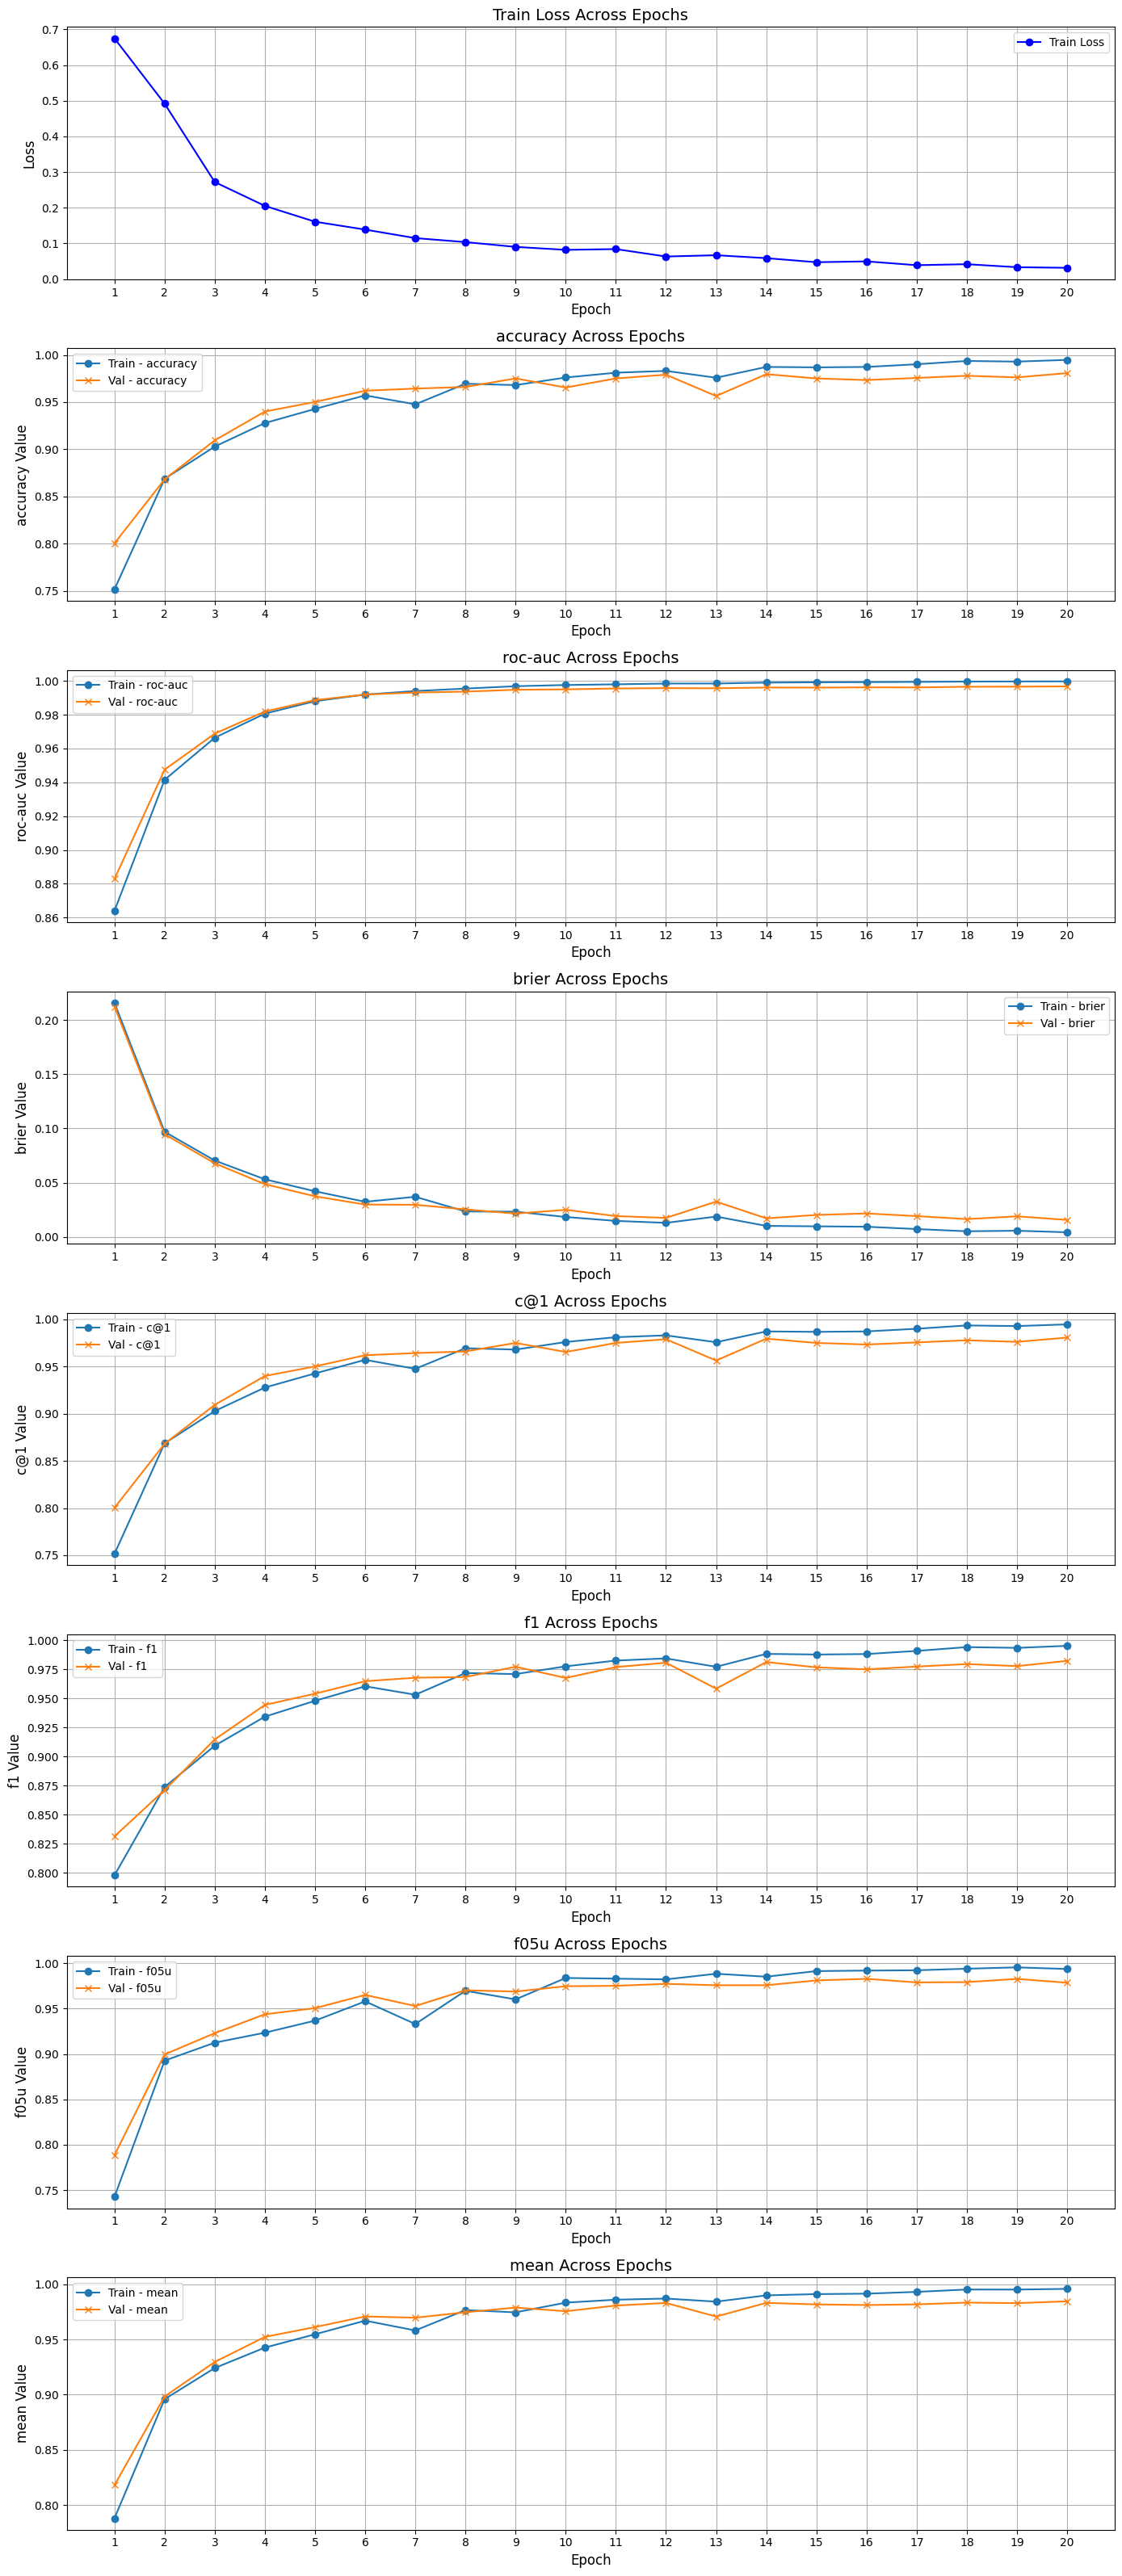

In [23]:
import matplotlib.pyplot as plt

metric_names = history["val_metrics"][0].keys()
epochs = list(range(1, len(history["val_metrics"]) + 1))

train_values = {name: [epoch.get(name, None) for epoch in history["train_metrics"]] for name in metric_names}
val_values = {name: [epoch.get(name, None) for epoch in history["val_metrics"]] for name in metric_names}

num_subplots = len(metric_names) + 1  # Number of metrics + train loss
plt.figure(figsize=(14, 4 * num_subplots))  # Increase height proportional to the number of plots

# Plot train loss
plt.subplot(num_subplots, 1, 1)

plt.plot(epochs, history["train_loss"], label="Train Loss", marker="o", color="blue")
plt.title("Train Loss Across Epochs", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.xticks(epochs)
plt.grid(True)
plt.legend()

# Plotting each metric in a separate graph
for idx, metric in enumerate(metric_names):
    plt.subplot(len(metric_names) + 1, 1, idx + 2)  # Adjust index for additional loss plot
    plt.plot(epochs, train_values[metric], label=f'Train - {metric}', marker='o')
    plt.plot(epochs, val_values[metric], label=f'Val - {metric}', marker='x')
    plt.title(f"{metric} Across Epochs", fontsize=14)
    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel(f"{metric} Value", fontsize=12)
    plt.xticks(epochs)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

## Final evaluation (Classification)

In [27]:
model = torch.load('models/models_individual_concatenate_embeddings/distil-bert-base/fine_tuned_model_20_epochs_3e-05_lr_1_layers_256_batch_size_checkpoint_14.pth')

In [28]:
# Evaluación final en el conjunto de prueba
train_accuracy = evaluate(model, train_loader, device)
print(f"Train Metrics: {train_accuracy}")
val_accuracy = evaluate(model, val_loader, device)
print(f"Val Metrics: {val_accuracy}")
test_accuracy = evaluate(model, test_loader, device)
print(f"Test Metrics: {test_accuracy}")

Train Metrics: {'accuracy': 0.9873116574147502, 'roc-auc': 0.9990165113917664, 'brier': 0.01027357923181403, 'c@1': 0.9873116574147502, 'f1': 0.9882796149016325, 'f05u': 0.9851867306488629, 'mean': 0.9899041870250397}
Val Metrics: {'accuracy': 0.9796380090497737, 'roc-auc': 0.996112415554457, 'brier': 0.017207751504404005, 'c@1': 0.9796380090497737, 'f1': 0.9812695109261186, 'f05u': 0.9757864238410595, 'mean': 0.983119721573401}
Test Metrics: {'accuracy': 0.9694570135746606, 'roc-auc': 0.996199467838606, 'brier': 0.02372124294860438, 'c@1': 0.9694570135746606, 'f1': 0.9717573221757322, 'f05u': 0.9693238731218697, 'mean': 0.9766032867524528}
